案例1：企业绩效评价
近年来，关于交通运输业上市公司的股票投资备受关注。投资者为了获得更多的收益，需要对公司的投资效益进行分析，掌握这些上市公司的经营状况、盈利状况等。

下表给出了交通运输业的30家上市公司的8项财务指标数据(数据来源于巨潮资讯)。
这8项指标分别为X1:基本每股收益(元);X2:每股净资产(元);X3:净资产收益率(%);X4:净利润率(%);X5:总资产报酬率(%);X6:存货周转率;X7:固定资产周转率;X8:总资产周转率。

现使用因子分析方法对这些公司的整体投资效益进行评价，以便于投资者更好地进行决策，

In [1]:
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

dataset = pd.read_csv('./datas/例6-2.txt',sep='\t').set_index('上市公司')
# X1:基本每股收益(元);X2:每股净资产(元);X3:净资产收益率(%);X4:净利润率(%);X5:总资产报酬率(%);X6:存货周转率;X7:固定资产周转率;
dataset.rename(columns={ 'X1':'基本每股收益', 'X2':'每股净资产', 'X3':'净资产收益率', 'X4':'净利润率', 'X5':'总资产报酬率', 'X6':'存货周转率', 'X7':'固定资产周转率', 'X8':'总资产周转率' },inplace=True)
index = dataset.index
labels = dataset.columns
mo_all, kmo_model=calculate_kmo(dataset)
chi_square,p = calculate_bartlett_sphericity(dataset)
print(f"KMO统计量的值为：{kmo_model:.4f}")
print(f"Bartlett球形检验的结果显示，在{p:.3%}的显著水平下，近似卡方{chi_square:.2f}，球形检验拒绝相关阵为单位阵的原假设，说明做因子分析的效果还可以。")

KMO统计量的值为：0.6601
Bartlett球形检验的结果显示，在0.000%的显著水平下，近似卡方179.13，球形检验拒绝相关阵为单位阵的原假设，说明做因子分析的效果还可以。


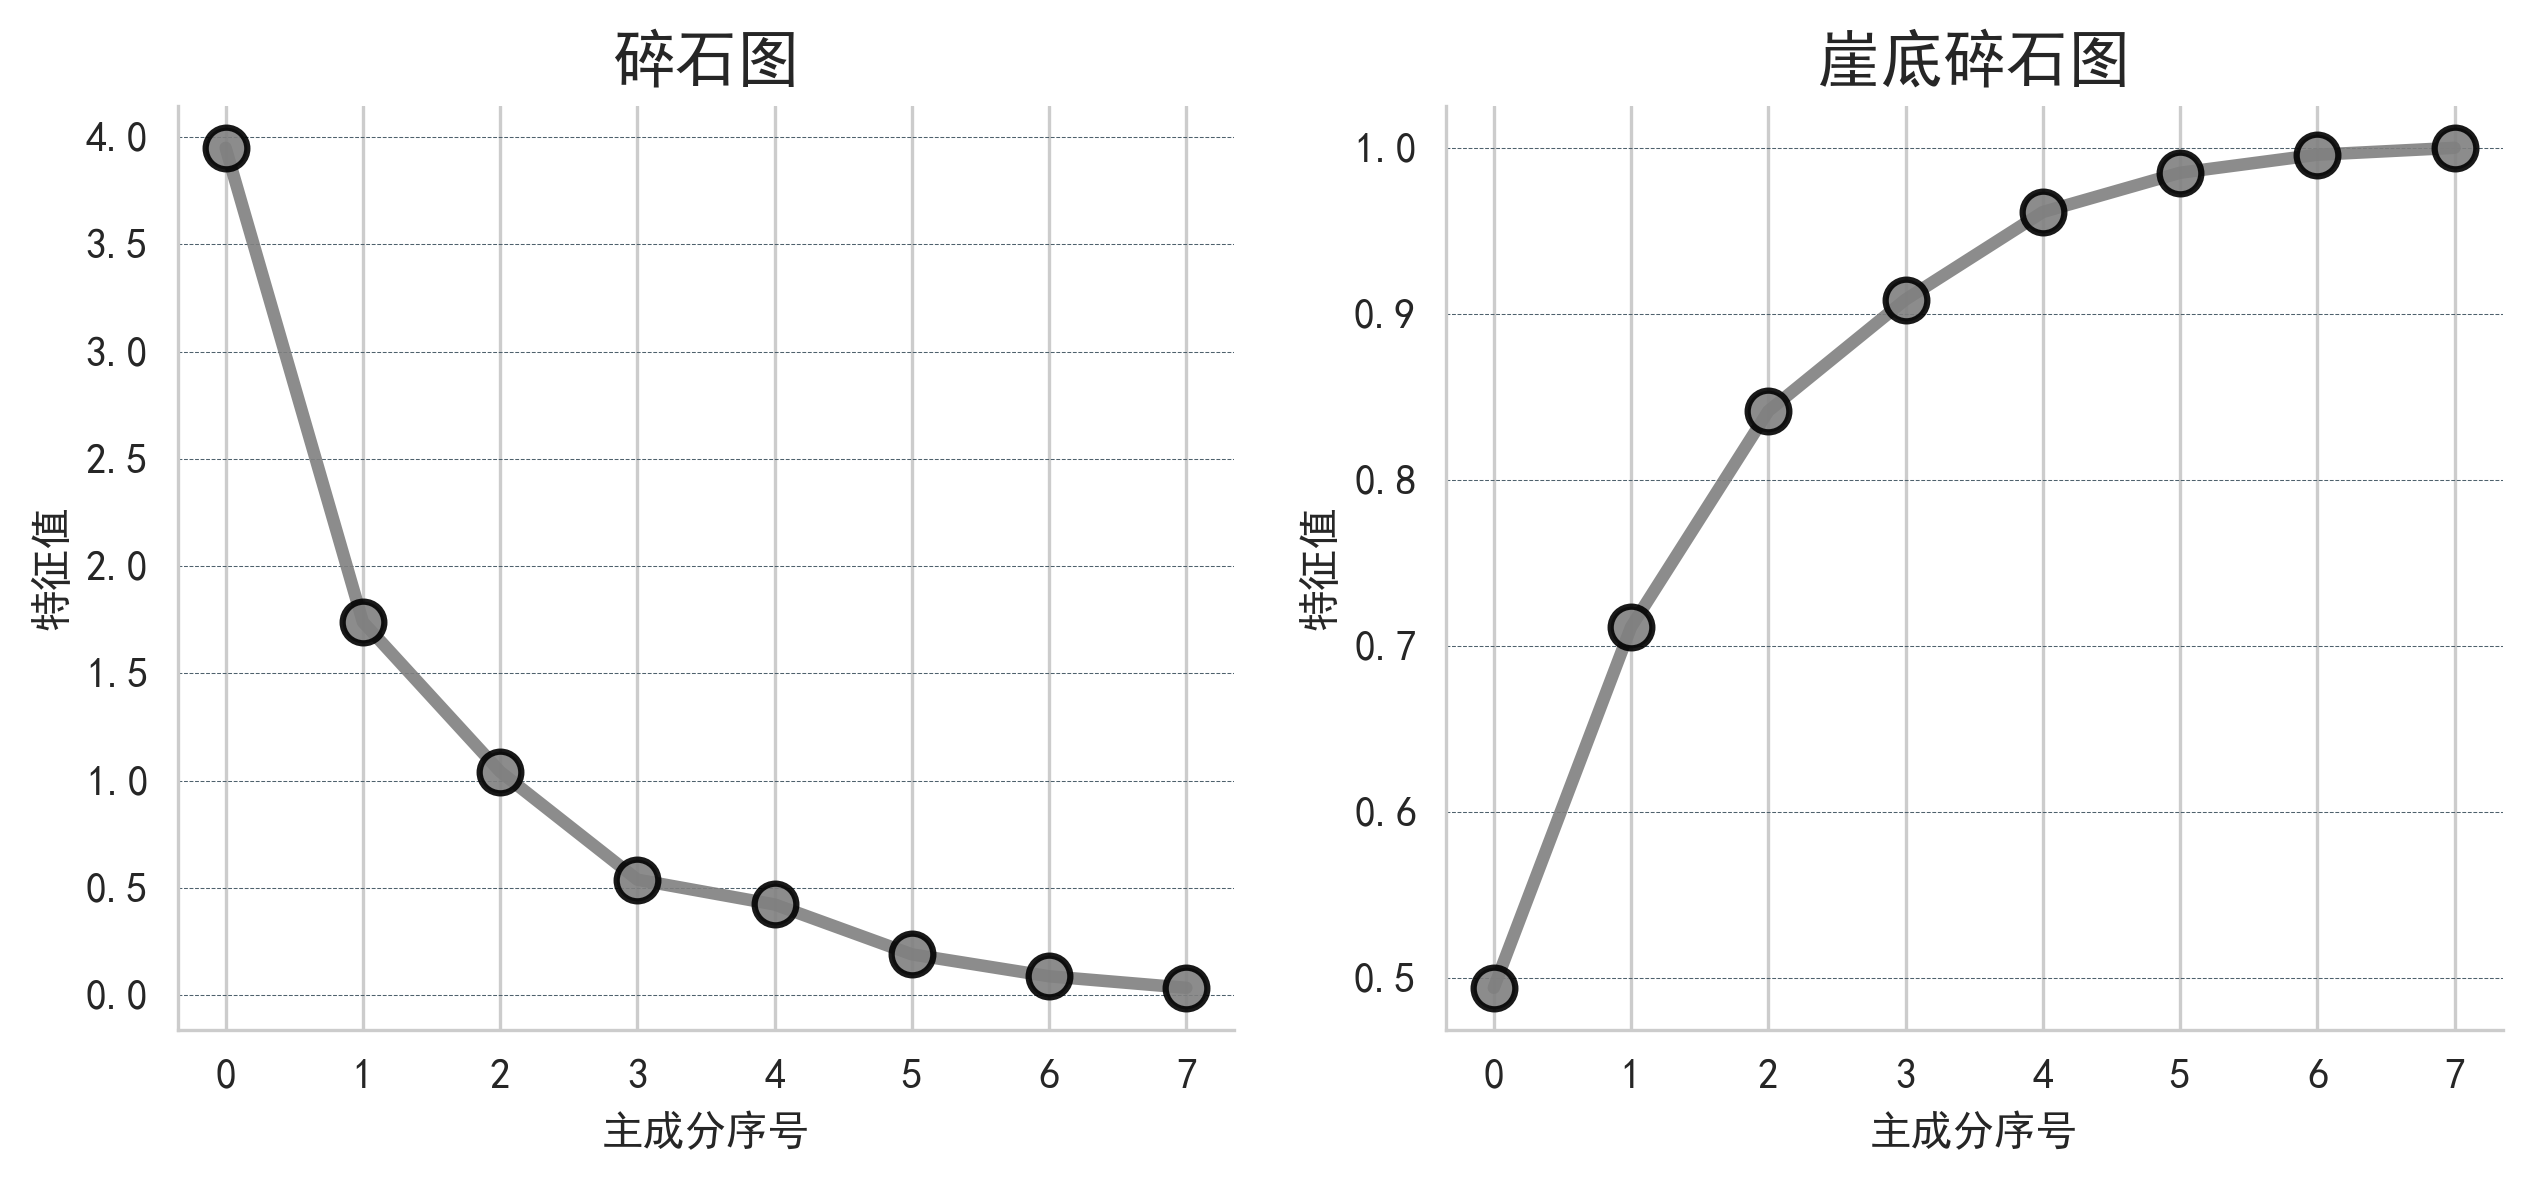

In [2]:
# 主成分法因子分析
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号

fa = FactorAnalyzer(rotation=None, method='principal')
fa.fit(dataset)
Eigvalue = pd.Series(fa.get_eigenvalues()[0], index=labels)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=300)
ax1.grid(ls = "--",axis='y', lw = 0.25, color = "#4E616C")
names = [i for i in range(len(Eigvalue))]
ax1.plot(names, Eigvalue, linestyle='-', linewidth=3, color='grey', marker = "o",markeredgecolor='k',alpha=0.9,markersize='10',markeredgewidth=1.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel("主成分序号")
ax1.set_ylabel("特征值")
ax1.set_title("碎石图", fontsize=15)
xx = Eigvalue/Eigvalue.sum()
ax2.grid(ls = "--", axis='y', lw = 0.25, color = "#4E616C")
ax2.plot(names, xx.cumsum(),linestyle='-', linewidth=3, color='grey', marker = "o",markeredgecolor='k',alpha=0.9,markersize='10',markeredgewidth=1.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel("主成分序号")
ax2.set_ylabel("特征值")
ax2.set_title("崖底碎石图", fontsize=15)
# ax2.axhline(y=0.93, xmin=-1.5, xmax=10, color='black', linestyle=':')
plt.show()

选择因子个数。
由方差解释表和碎石图可看出，前三个特征根较大，其余五个特征根较小，而且前三个公共因子的总方差贡献率为84.1%，
基本提取了样本所包含的信息，因此选择三个公共因子是合适的。也可以根据碎石图的变化趋势选择四个公共因子。

In [3]:
Eigvalue.name='Eigvalue'
Eigdt = Eigvalue.to_frame()
Eigdt['Variance'] = Eigdt['Eigvalue'].apply(lambda x: x/Eigdt['Eigvalue'].sum())
Eigdt['Cumulative'] = Eigdt['Variance'].cumsum()
print('初始特征值')
Eigdt

初始特征值


,Eigvalue,Variance,Cumulative
基本每股收益,3.950403,0.493800,0.493800
每股净资产,1.739356,0.217419,0.711220
净资产收益率,1.041173,0.130147,0.841366
净利润率,0.537585,0.067198,0.908565
总资产报酬率,0.421917,0.052740,0.961304
存货周转率,0.189259,0.023657,0.984962
固定资产周转率,0.087017,0.010877,0.995839
总资产周转率,0.033290,0.004161,1.000000


[3.950403152005978, 1.7393558877296682, 1.041172830161008, 0.5375854515801949, 0.42191743842022084, 0.18925879594127593, 0.08701670865371579, 0.03328973550793821]


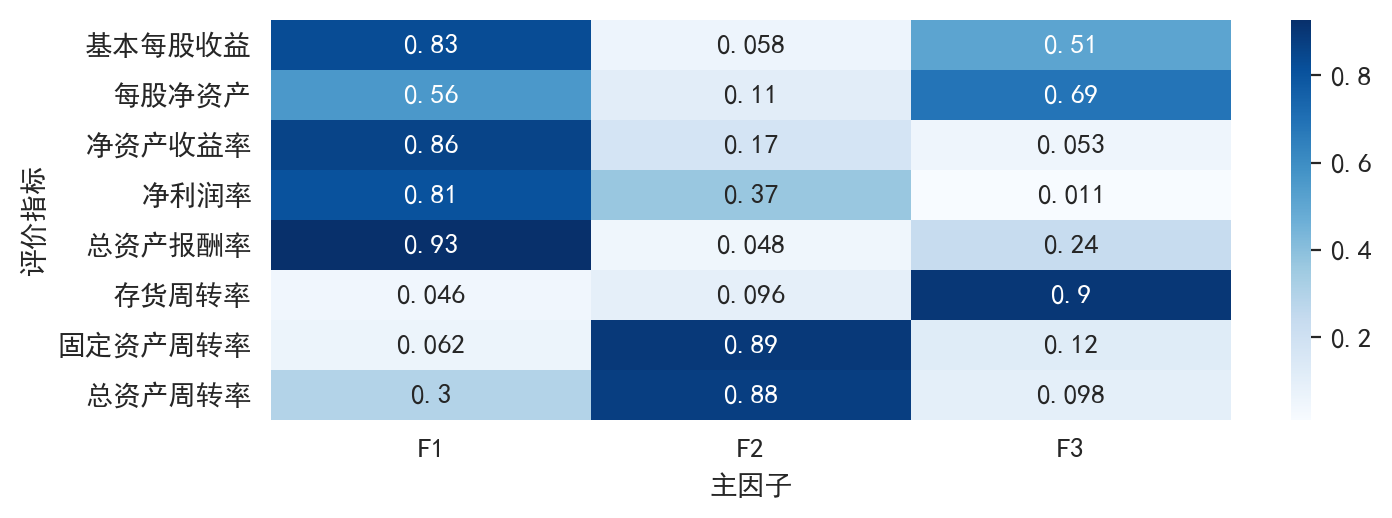

In [15]:
import seaborn as sns
from factor_analyzer import Rotator

fig = plt.figure(figsize=(6, 2),dpi=200)
ax = fig.add_axes([0,0,1,1])

n_factors = 3
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='principal')
fa.fit(dataset)
Eigvalue = pd.Series(fa.get_eigenvalues()[0])
print(Eigvalue.tolist())
loading = pd.DataFrame(fa.loadings_,index=labels,columns=[f'F{i+1}' for i in range(n_factors)])
sns.heatmap(loading.abs(), cmap='Blues', annot=True)
ax.set_xlabel('主因子')
ax.set_ylabel('评价指标')
plt.show()

loading是进行方差最大化正交旋转后的因子载荷。可以看出，第一个公共因子主要由基本每股收益、净资产收益率、净利润率和总资产报酬率四个指标决定，尤其总资产报酬率对F的贡献最大，它主要代表公司的盈利能力，说明盈利能力在衡量公司的投资效益方面占有重要地位，公司的盈利能力越强，意味着越具有投资价值。

第二个公共因子F,主要由固定资产周转率和总资产周转率决定，是代表公司经营效率的指标，主要反映企业运营能力。

第三个公共因子F主要由存货周转率和每股净资产决定，尤其前者在F上的因子载荷为0.9，是衡量企业运营能力的主要指标;后者反映公司的资本规模，是衡量公司投资价值的重要指标。

In [25]:
import numpy as np
weights_ = np.linalg.inv(fa.corr_).dot(fa.loadings_)
print('由该得分系数矩阵可得两个公共因子关于标准化原始变量的线性表达式分别为:')
for i in range(weights_.shape[1]):
    k = weights_[:, i]
    ss = [f'{ k[j]:+.3f}' + f'*X{j+1}' for j in range(len(k))]
    print(f'F{i+1}={"".join(ss) if "".join(ss).startswith("-") else "".join(ss)[1:]}')
weights_

由该得分系数矩阵可得两个公共因子关于标准化原始变量的线性表达式分别为:
F1=0.205*X1+0.055*X2+0.309*X3+0.284*X4+0.315*X5-0.229*X6+0.159*X7-0.044*X8
F2=0.091*X1+0.077*X2-0.010*X3-0.128*X4+0.118*X5-0.121*X6+0.553*X7+0.486*X8
F3=0.179*X1+0.387*X2-0.170*X3-0.193*X4-0.062*X5+0.704*X6-0.180*X7+0.088*X8


array([[ 0.20450106,  0.09121235,  0.17924275],
       [ 0.05519523,  0.07725436,  0.38652546],
       [ 0.30930275, -0.00987024, -0.170343  ],
       [ 0.28409747, -0.12805541, -0.19306365],
       [ 0.31454232,  0.11760546, -0.06153829],
       [-0.22859976, -0.12079672,  0.70426828],
       [ 0.15895274,  0.5529765 , -0.17952311],
       [-0.04363474,  0.48613888,  0.08808007]])

In [26]:
# 计算因子得分
scores = pd.DataFrame(fa.transform(dataset),index=index, columns=[f'PC{i+1}' for i in range(n_factors)])
scores['Total'] = scores.dot(fa.get_factor_variance()[1])
scores.sort_values(by=['Total'], ascending=False)

,PC1,PC2,PC3,Total
上市公司,,,,
外运发展,2.055219,2.184192,0.526002,1.446966
上海机场,2.466687,-0.048707,0.927367,1.209525
厦门空港,-0.089974,-0.708469,4.749802,0.771254
宁沪高速,1.621195,0.547477,-1.252801,0.544150
宜昌交运,-0.058178,1.105434,0.842570,0.389914
大秦铁路,1.016265,-0.083433,-0.111025,0.384233
皖通高速,1.075406,-0.157450,-0.624914,0.288321
白云机场,0.696360,-0.298956,0.019198,0.229456
交运股份,-0.316431,1.559951,-0.020322,0.206585


分别计算三个公共因子的得分。以各因子的方差贡献率占三个因子总方差贡献率的比重作为权重进行加权汇总，得到各公司的综合得分F(这种综合评价方法目前应用较多，但也有较大争议，故应慎用)。根据综合得分F的大小降序排列。

计算综合因子得分这种综合评价方法应用非常普遍，但有些文献提出不同看法，主要是认为产生公共因子的特征向量的各级分量符号不一致，很难进行排序评价，从而认为综合评价方法不严谨。

其实很多统计方法都存在一些理论问题没有解决，但似乎并不影响人们使用的热情。统计学应用中许多问题的完善需要人们去实践、去探讨，这个问题当然也在其中。

由上表可知，外运发展公司的投资价值最大，该公司的盈利能力和经营能力均较强因此该公司的股票适合投资。其次是上海机场，虽然它的综合因子得分位于第二，但它的经营能力相对较弱。如果投资者较盈利能力更看重公司的经营能力的话，他可能不会投资上海机场。综合得分主要衡量的是公司的综合投资价值，对于两方面表现均最差的公司，其投资价值也相应最低，如西部创业公司。

案例2：区域公用事业的发展是地区综合发展的重要组成部分，是促进社会发展的重要因素。因此，分析评价全国31个省、直辖市、自治区在城市公共交通、市政、设施等各方面的建设，把握各地区公用事业的整体发展水平具有重要意义。下面应用因子分析模型，选取反映城市公用事业建设的12个指标作为原始变量，对全国各地区公用事业的整体发展水平做分析评价。
这12个指标分别为X1:城区面积(平方公里);X2:建成区面积(平方公里):X3:人均公园绿地面积(平方米);X4:城市建设用地面积(平方公里);X5:年末实有道路长度(公里);X6:年末实有道路面积(万平方米);X7,:城市排水管道长度(公里);X8:城市道路照明灯(千盏);X9:年末公共交通车辆运营数(辆);X10:运营线路总长度(公里);X11:每万人拥有公共交通车辆(标台);X12:出租汽车数量(辆)。

原始数据来源于2017年《中国统计年鉴》。


In [1]:
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

dataset = pd.read_csv('./datas/例6-3.txt',sep='\t').set_index('地区')
dataset.rename(columns={ 'X1':'城区面积', 'X2':'建成区面积', 'X3':'人均公园绿地面积', 'X4':'城市建设用地面积', 'X5':'年末实有道路长度', 'X6':'年末实有道路面积', 'X7':'城市排水管道长度', 'X8':'城市道路照明灯','X9':'年末公共交通车辆运营数','X10':'运营线路总长度','X11':'每万人拥有公共交通车辆','X12':'出租汽车数量'},inplace=True)
index = dataset.index
labels = dataset.columns
mo_all, kmo_model=calculate_kmo(dataset)
chi_square,p = calculate_bartlett_sphericity(dataset)
print(f"KMO统计量的值为：{kmo_model:.3%}")
print(f"Bartlett球形检验的结果显示，在{p:.3%}的显著水平下，近似卡方{chi_square:.2f}，球形检验拒绝相关阵为单位阵的原假设，说明做因子分析的效果还可以。")

KMO统计量的值为：83.689%
Bartlett球形检验的结果显示，在0.000%的显著水平下，近似卡方655.66，球形检验拒绝相关阵为单位阵的原假设，说明做因子分析的效果还可以。


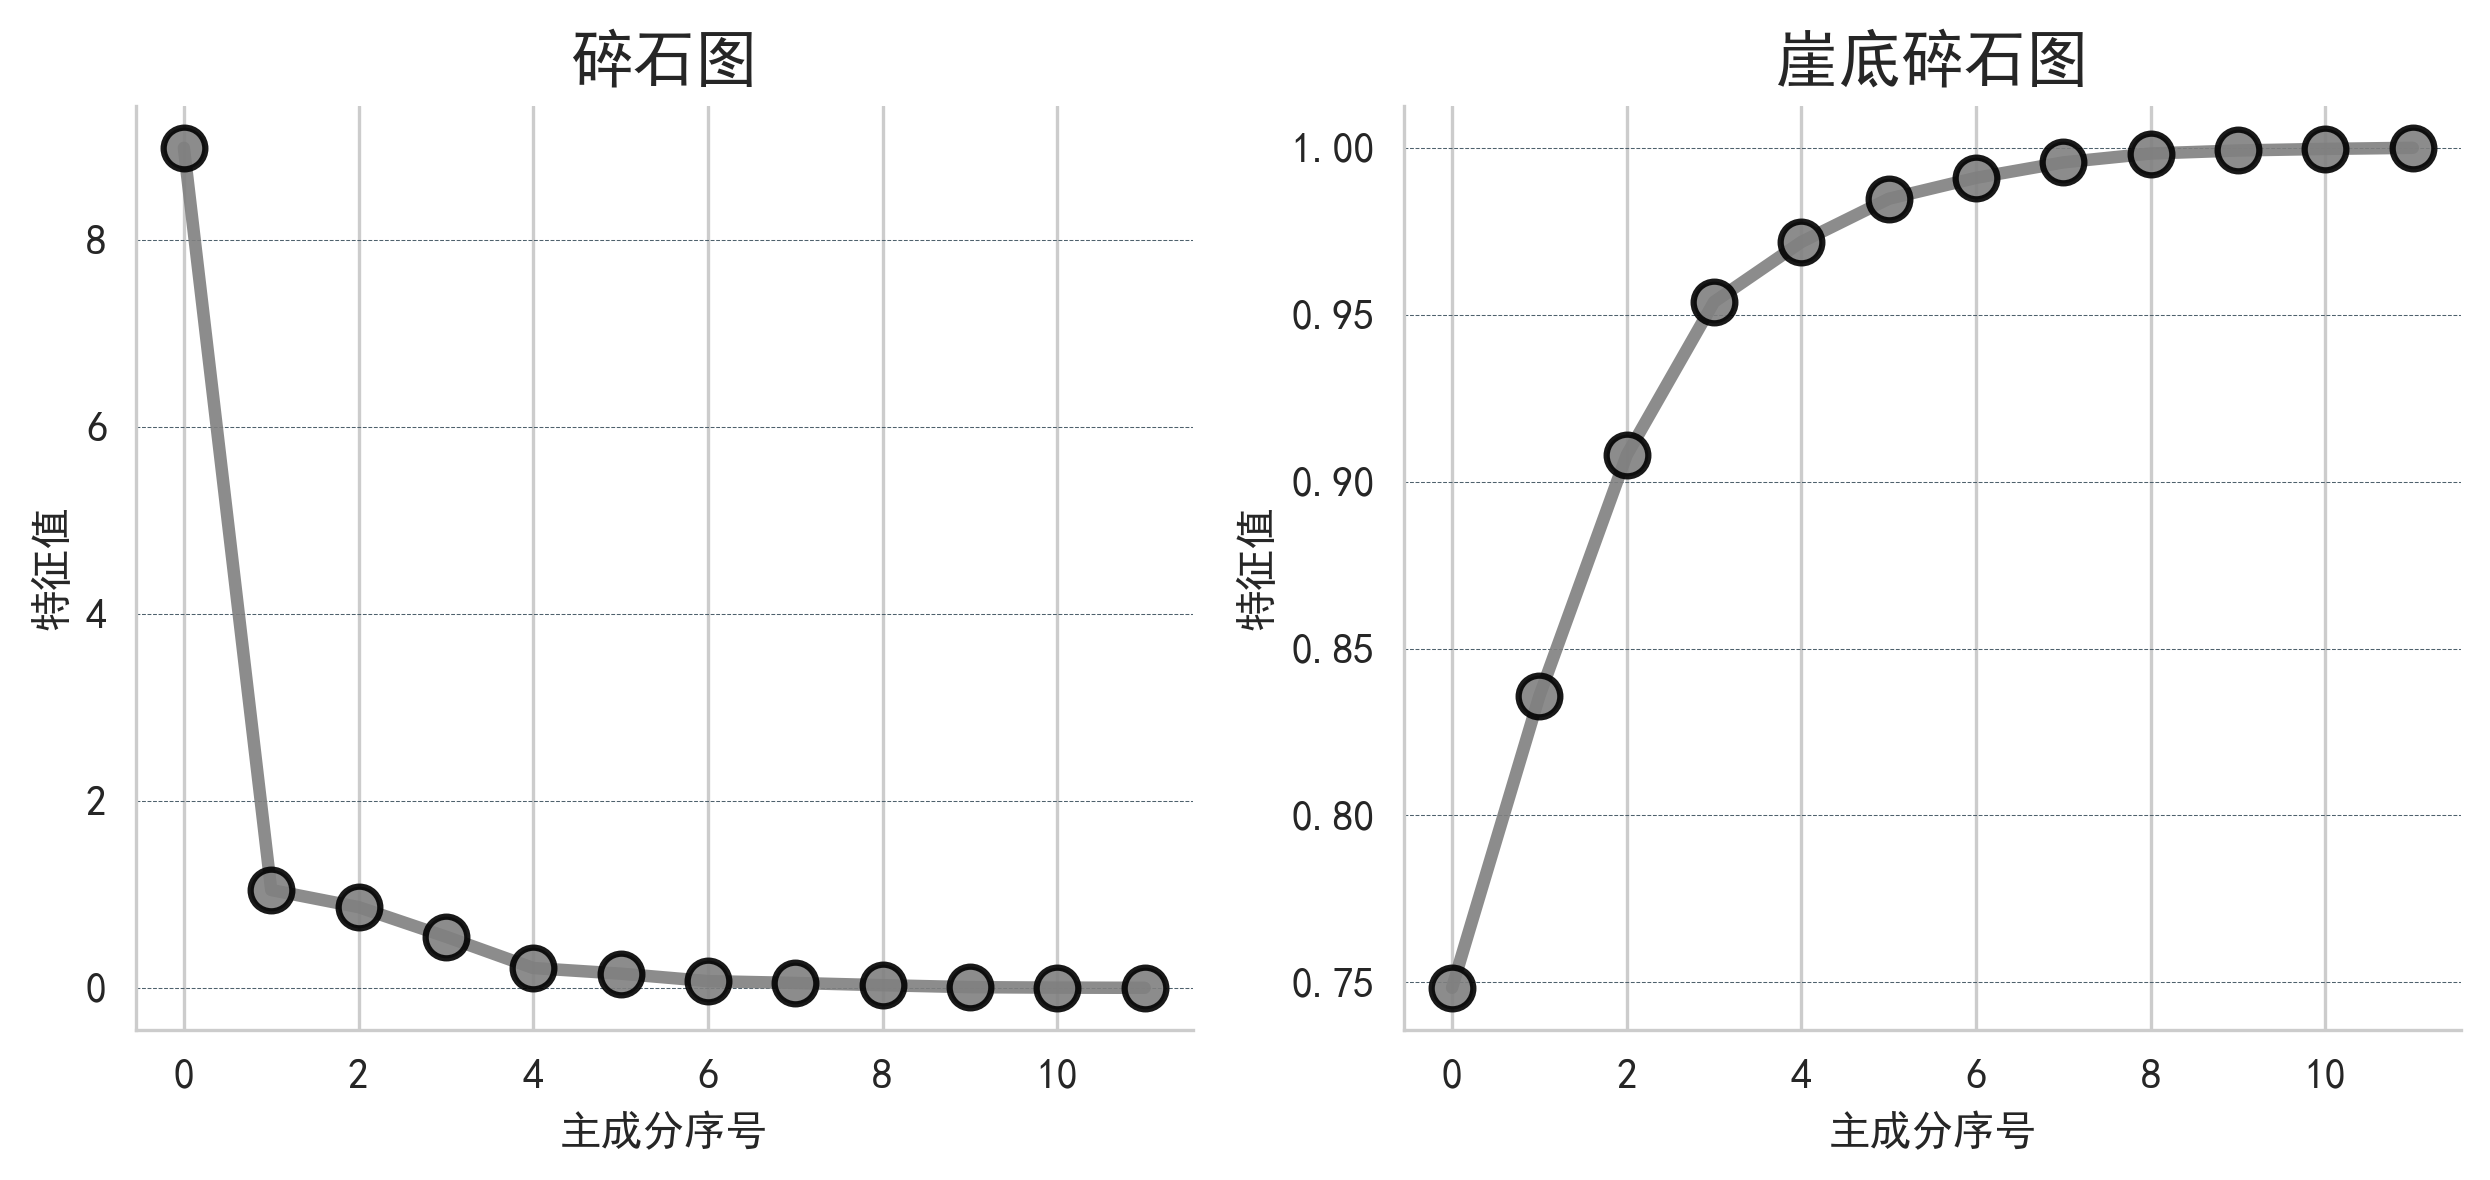

In [2]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号

n_factors = 3
fa = FactorAnalyzer(n_factors=n_factors,rotation='varimax', method='principal')
fa.fit(dataset)
Eigvalue = pd.Series(fa.get_eigenvalues()[0], index=labels)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=300)
ax1.grid(ls = "--",axis='y', lw = 0.25, color = "#4E616C")
names = [i for i in range(len(Eigvalue))]
ax1.plot(names, Eigvalue, linestyle='-', linewidth=3, color='grey', marker = "o",markeredgecolor='k',alpha=0.9,markersize='10',markeredgewidth=1.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel("主成分序号")
ax1.set_ylabel("特征值")
ax1.set_title("碎石图", fontsize=15)
xx = Eigvalue/Eigvalue.sum()
ax2.grid(ls = "--", axis='y', lw = 0.25, color = "#4E616C")
ax2.plot(names, xx.cumsum(),linestyle='-', linewidth=3, color='grey', marker = "o",markeredgecolor='k',alpha=0.9,markersize='10',markeredgewidth=1.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel("主成分序号")
ax2.set_ylabel("特征值")
ax2.set_title("崖底碎石图", fontsize=15)
# ax2.axhline(y=0.93, xmin=-1.5, xmax=10, color='black', linestyle=':')
plt.show()

方差解释表和碎石图显示，前三个公共因子总的方差贡献率为90.8%，基本提取了样本所包含的信息，随着公共因子个数大于3，碎石图中曲线的变化趋势明显趋于平稳，据此确定选择三个公共因子。

In [3]:
Eigvalue.name='Eigvalue'
Eigdt = Eigvalue.to_frame()
Eigdt['Variance'] = Eigdt['Eigvalue'].apply(lambda x: x/Eigdt['Eigvalue'].sum())
Eigdt['Cumulative'] = Eigdt['Variance'].cumsum()
print('初始特征值')
Eigdt

初始特征值


,Eigvalue,Variance,Cumulative
城区面积,8.980410,0.748368,0.748368
建成区面积,1.049067,0.087422,0.835790
人均公园绿地面积,0.866286,0.072191,0.907980
城市建设用地面积,0.550525,0.045877,0.953857
年末实有道路长度,0.215365,0.017947,0.971804
年末实有道路面积,0.155160,0.012930,0.984734
城市排水管道长度,0.075272,0.006273,0.991007
城市道路照明灯,0.055581,0.004632,0.995639
年末公共交通车辆运营数,0.031824,0.002652,0.998291
运营线路总长度,0.010897,0.000908,0.999199


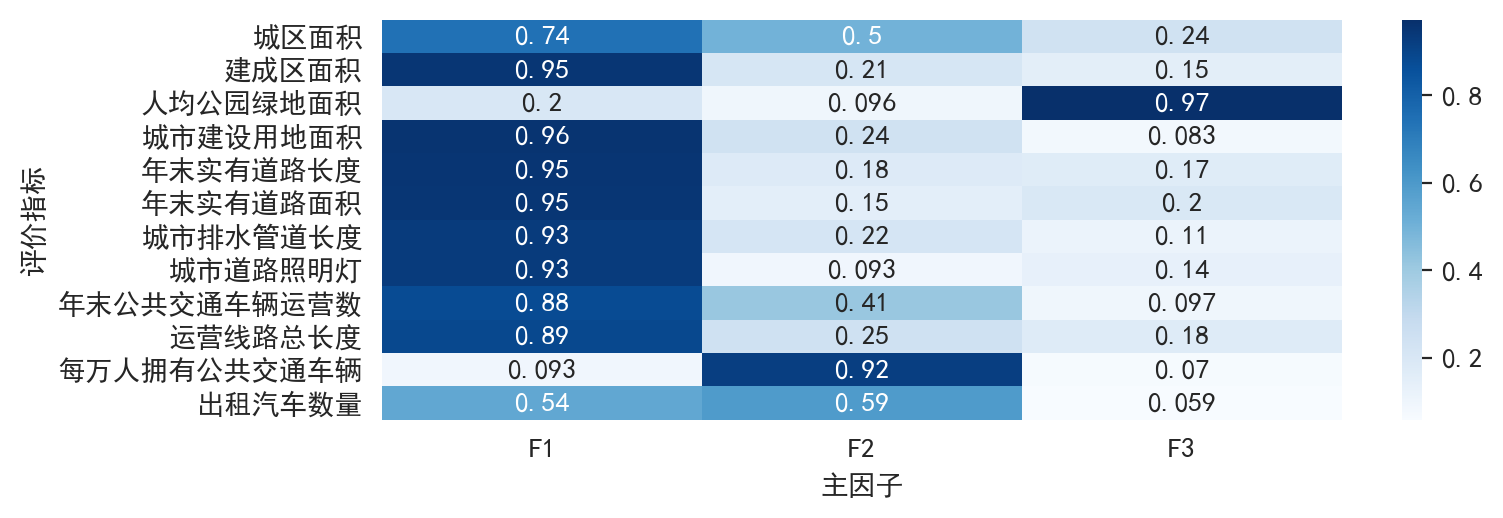

In [4]:
import seaborn as sns

result = pd.DataFrame(fa.loadings_, index=labels,columns=[f'F{i+1}' for i in range(n_factors)])
fig = plt.figure(figsize=(6, 2),dpi=200)
ax = fig.add_axes([0,0,1,1])
sns.heatmap(result.abs(), cmap='Blues', annot=True)
ax.set_xlabel('主因子')
ax.set_ylabel('评价指标')
plt.show()

为便于解释公共因子的实际意义，旋转载荷矩阵表中给出了进行方差最大化正交旋转后的因子载荷。可以看出，第一个公共因子主要由建成区面积、城市建设用地面积、年末实有道路长度、年末实有道路面积、城市排水管道长度、城市道路照明灯、年末公共交通车辆运营数、运营线路总长度决定，而且各指标对F1的贡献基本相当。

X2，X4是反映城市基础建设的指标，X5，X6，X7，X8是反映城市市政设施建设的指标，X9，X10是反映公共交通建设的指标。因此，F1是相对综合的因子，基本反映了城市公共建设的整体水平。

第二个公共因子F2主要由每万人拥有公共交通车辆决定，主要反映公共交通的建设水平，拥有的公共交通车辆越多公民的出行越便利。
第三个公共因子F3主要由人均公园绿地面积决定，主要反映城市基础建设的情况。

In [5]:
# 各地公因子得分
score = pd.DataFrame(fa.transform(dataset),index=index, columns=[f'PC{i+1}' for i in range(n_factors)])
score['tol'] = score.dot(fa.get_factor_variance()[1])
score.sort_values(by=['tol'], ascending=False)

,PC1,PC2,PC3,tol
地区,,,,
广东,2.789163,0.156488,0.999913,1.938968
江苏,2.698706,-0.033387,0.034229,1.755066
山东,2.215913,0.654404,1.331151,1.677304
浙江,0.975148,0.565327,-0.191739,0.705736
辽宁,0.565184,0.978185,-0.869874,0.437708
四川,0.552206,-0.208408,-0.373680,0.289731
河南,0.590946,-0.413665,-1.173360,0.203812
湖北,0.436435,-0.059744,-0.840874,0.192043
河北,0.058189,0.395921,0.305788,0.130751


C:\Users\shelhen\AppData\Local\Temp\ipykernel_11916\4117317971.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(score['PC1'][i], score['PC2'][i]+0.001, score.index[i], ha='center', va='bottom', fontsize=8)


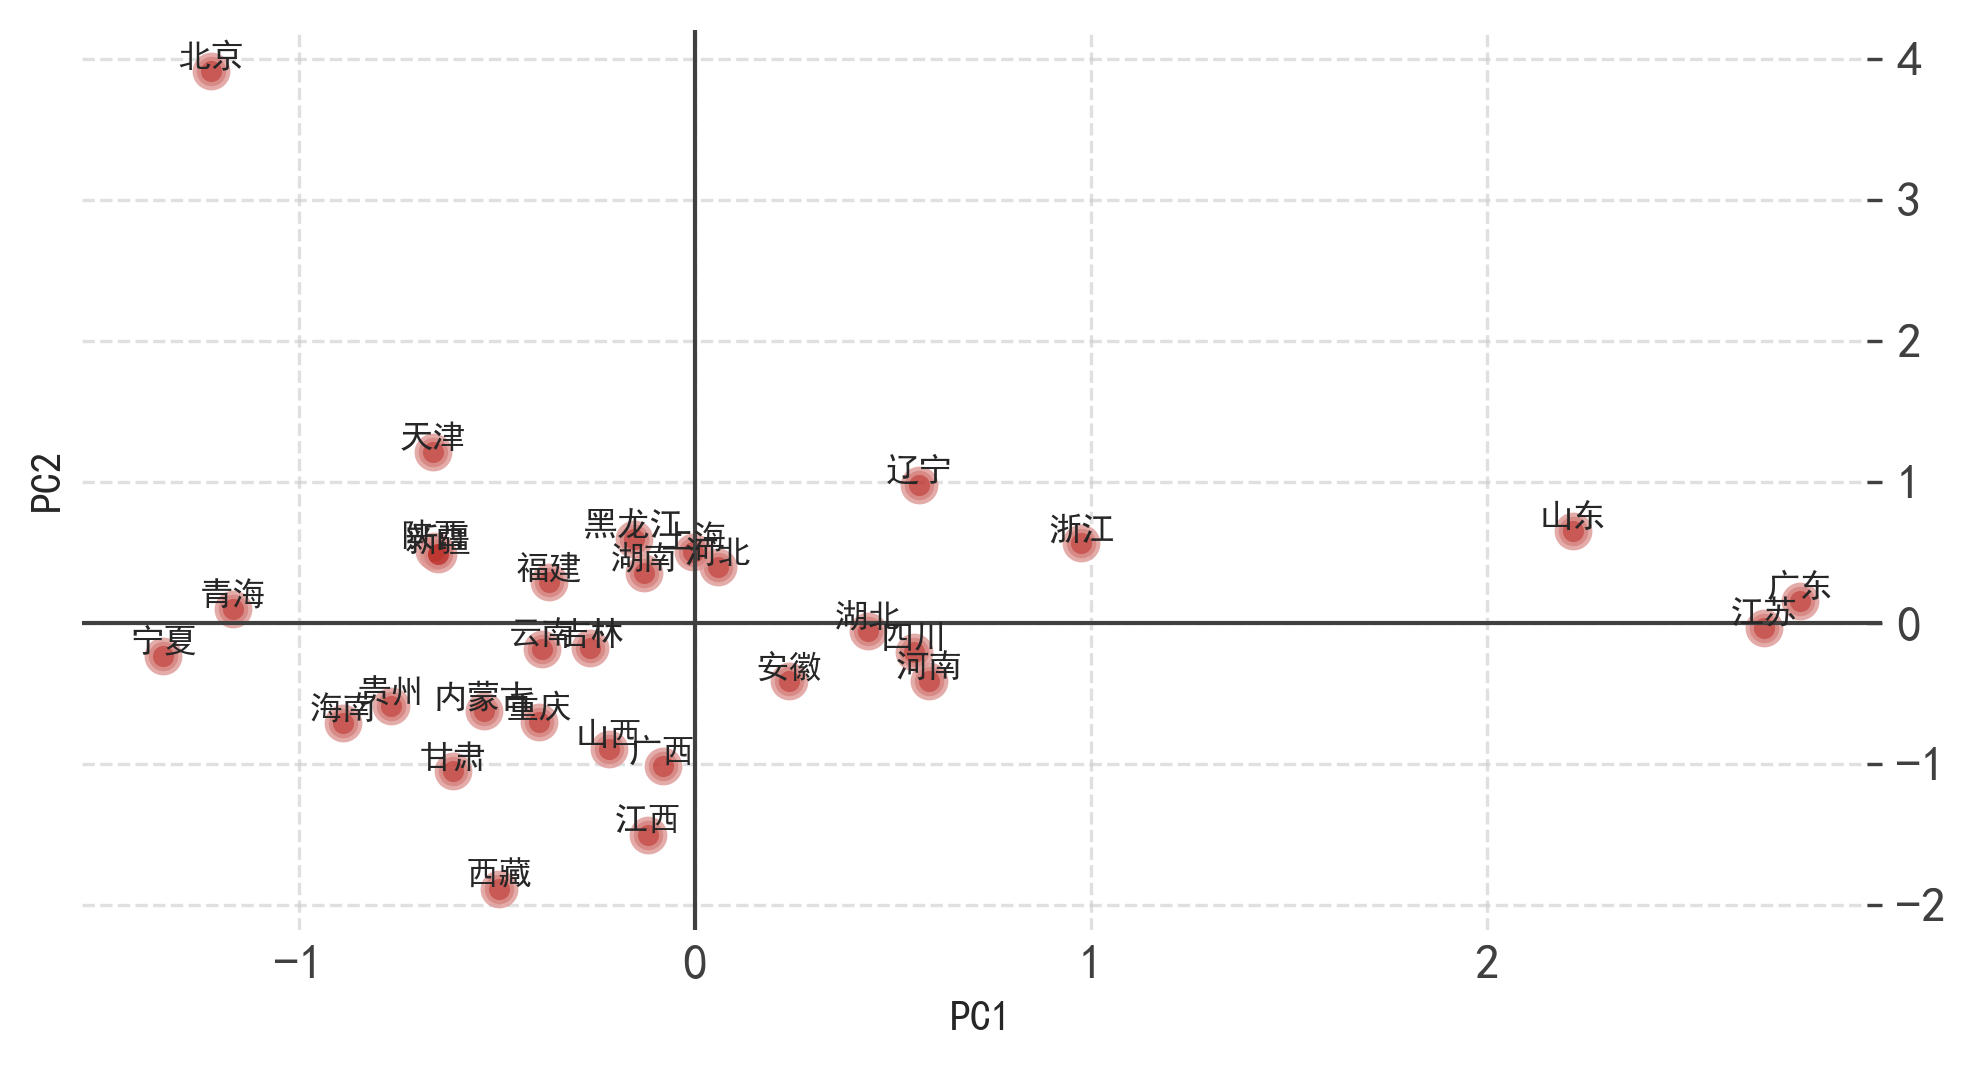

In [7]:
# 为更加直观地分析各地区公用事业建设的水平，以F1因子得分为x轴，F2因子得分为y轴画散点图：

# 绘制得分散点图
import matplotlib.pyplot as plt
# 使用scatter方法绘制散点图

fig = plt.figure(figsize=(6, 3),dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.scatter(score['PC1'], score['PC2'], s=50, c='#BC302A', alpha=0.8, edgecolor='#DD9794', linewidths=2)

for i in range(score.shape[0]):
    ax.text(score['PC1'][i], score['PC2'][i]+0.001, score.index[i], ha='center', va='bottom', fontsize=8)
ax.axhline(y=sum(score['PC1'])/31 , color='#404040' , linestyle='-',linewidth=1)
ax.axvline(x=sum(score['PC2'])/31, color='#404040' , linestyle='-',linewidth=1)
ax.tick_params(axis='both',
               labelsize=12, # y轴字体大小设置
               color='#404040',    # y轴标签颜色设置  
               labelcolor='#404040', # y轴字体颜色设置
               direction='in' # y轴标签方向设置
               )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.grid(ls ='--', c='#ccc', alpha=0.6)
ax.yaxis.tick_right()
for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)
plt.show()

由散点图可知，除北京在因子F2上的得分较大外，其他地区在F2上的得分相差不是特别大，说明北京的公共交通极其便利，在其他地区中上海的公共交通最便利，西藏的公共交通建设最差，很明显，西藏地区的公共交通建设主要受地理因素的影响。

在较为综合的因子F1上，得分最高的是广东，说明广东省公用事业的综合发展水平较高，基础设施建设比较全面，但公共交通建设有待进一步加强。F1的得分较高的地区还有江苏、山东浙江、河南，其中江苏和浙江地区的经济发展水平也较高，说明这些地区的发展相对比较全面，人民的生活质量可以较好地得到保障。另外，F1的得分较低的地区有宁夏、青海海南、贵州、陕西、新疆。一方面这些地区的经济发展水平相对较低，另一方面这些地区所处的环境相对较差，可能会对公用事业建设产生较大影响。

因此，全国各地区若要全面协调发展，国家应加大对西部地区的投资和帮扶力度，促进西部地区的发展。